In [56]:
import pandas as pd
import time
from geopy.geocoders import Nominatim
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from matplotlib.colors import LinearSegmentedColormap
import os
geolocater = Nominatim(user_agent="suddenjan")

In [57]:
# Read DataFrames
rental_rates = pd.read_csv("Resources/fy2024rent.csv", dtype=str)
USZip = pd.read_csv("Resources/USZipCodes.csv")

# Rename columns in rental_rates DataFrame
rental_rates = rental_rates.rename(columns={"HUD Metro Fair Market Rent Area Name": "City", "ZIPCode": "Zip Code", "erap_fmr_br0": "Studio", "erap_fmr_br1": "1Bed", "erap_fmr_br2": "2Bed", "erap_fmr_br3": "3Bed", "erap_fmr_br4": "4Bed"})
rental_rates = rental_rates[["City", "Zip Code", "Studio", "1Bed", "2Bed", "3Bed", "4Bed"]]

# Convert 'Zip Code' column to string dtype in both DataFrames
rental_rates['Zip Code'] = rental_rates['Zip Code'].astype(str)
USZip['Zip Code'] = USZip['Zip Code'].astype(str)

# Merge DataFrames based on matching values in the 'Zip Code' column
merged_zip = pd.merge(rental_rates, USZip, on='Zip Code', how='inner')


In [58]:
merged_zip

City Zip Code  Studio    1Bed    2Bed    3Bed    4Bed  \
0      Abilene, TX MSA    76437    $860    $876  $1,117  $1,488  $1,789   
1      Abilene, TX MSA    76443    $860    $876  $1,117  $1,488  $1,789   
2      Abilene, TX MSA    76464    $860    $876  $1,117  $1,488  $1,789   
3      Abilene, TX MSA    76469    $860    $876  $1,117  $1,488  $1,789   
4      Abilene, TX MSA    79501    $860    $876  $1,117  $1,488  $1,789   
...                ...      ...     ...     ...     ...     ...     ...   
24826     Yuma, AZ MSA    85356    $956    $962  $1,264  $1,752  $2,145   
24827     Yuma, AZ MSA    85364    $956    $962  $1,264  $1,752  $2,145   
24828     Yuma, AZ MSA    85365  $1,020  $1,030  $1,350  $1,870  $2,290   
24829     Yuma, AZ MSA    85366    $956    $962  $1,264  $1,752  $2,145   
24830     Yuma, AZ MSA    85367  $1,150  $1,160  $1,520  $2,110  $2,580   

       Latitude  Longitude  
0       32.3800   -98.9865  
1       32.1482   -99.1872  
2       32.5549   -99.1656  
3       32.3740   -99.1957  
4       32.7489   -99.8953  
...         ...        ...  
24826   32.6935  -114.1561  
24827   32.7015  -114.6424  
24828   32.7093  -114.4905  
24829   32.6100  -114.6312  
24830   32.6566  -114.4042  

[24831 rows x 9 columns]

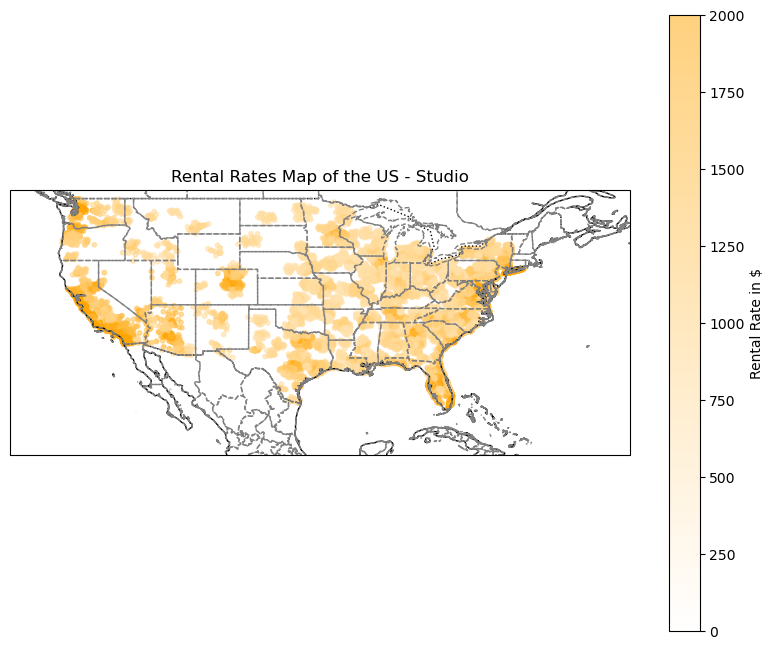

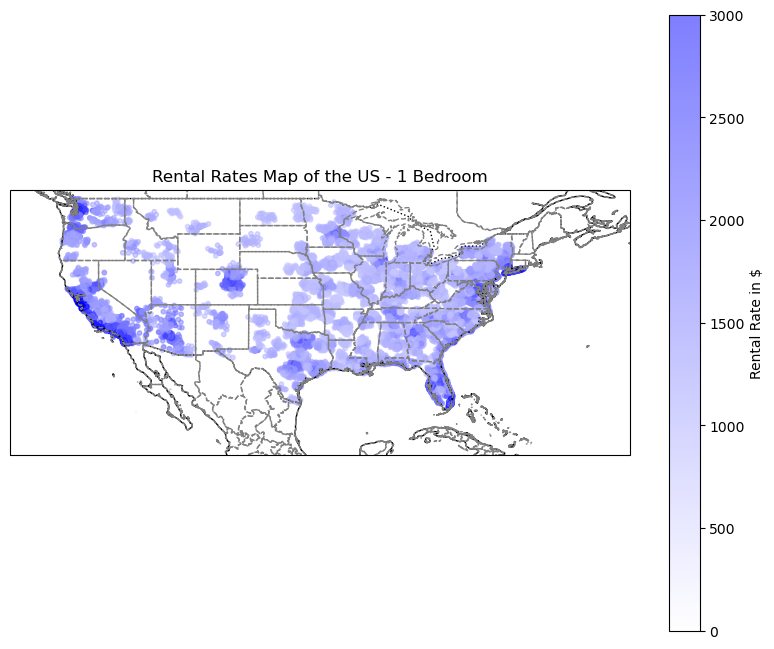

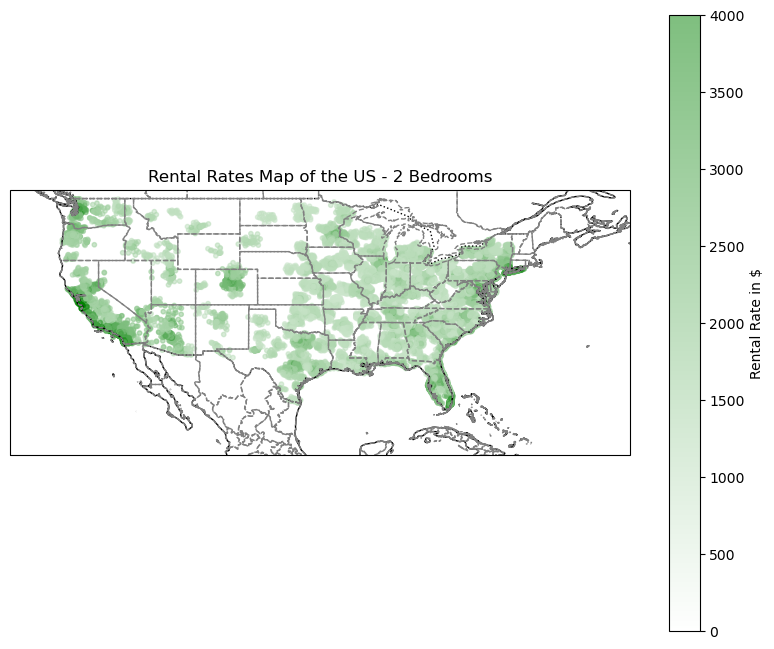

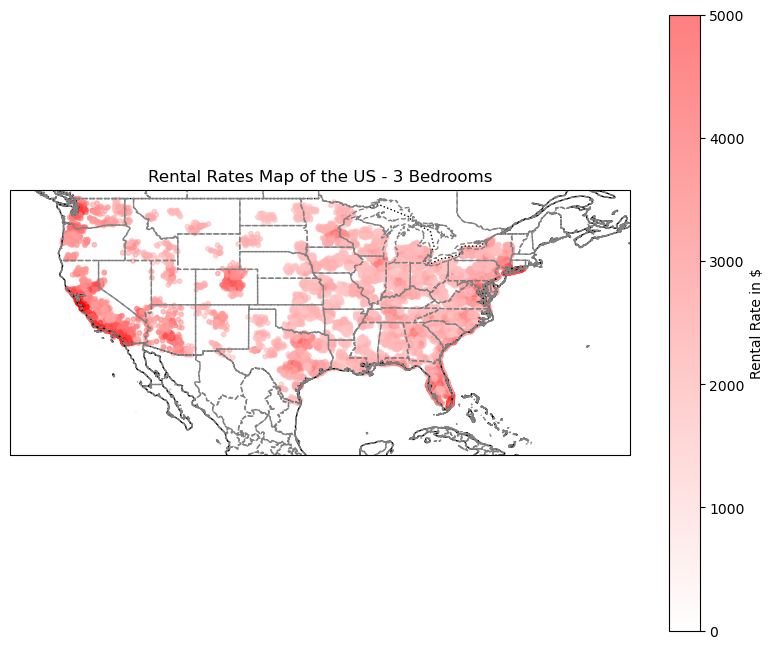

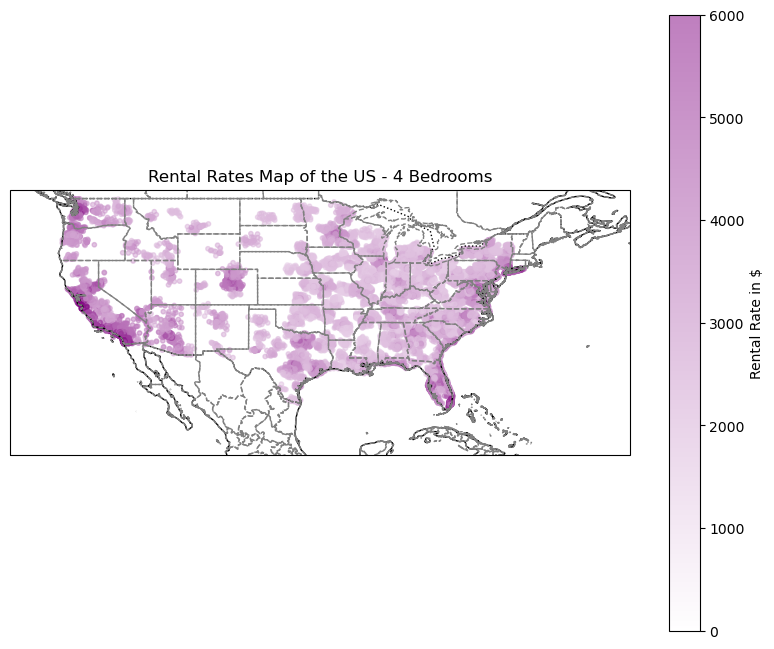

In [70]:
# Example rental rates data (replace with your actual data)
rental_rates_data = merged_zip[['Latitude', 'Longitude', 'Studio', '1Bed', '2Bed', '3Bed', '4Bed']].copy()

# Remove dollar signs and commas and convert to float
for col in ['Studio', '1Bed', '2Bed', '3Bed', '4Bed']:
    rental_rates_data[col] = rental_rates_data[col].str.replace('$', '').str.replace(',', '').astype(float)

# Drop rows with NaN values
rental_rates_data = rental_rates_data.dropna()

# Custom color ranges for each bedroom type
color_ranges = {
    'Studio': (0, 2000),
    '1Bed': (0, 3000),
    '2Bed': (0, 4000),
    '3Bed': (0, 5000),
    '4Bed': (0, 6000)
}

# Create a separate plot for each bedroom type including Studio
for col, color, label in [('Studio', 'orange', 'Studio'), ('1Bed', 'blue', '1 Bedroom'), ('2Bed', 'green', '2 Bedrooms'), ('3Bed', 'red', '3 Bedrooms'), ('4Bed', 'purple', '4 Bedrooms')]:
    # Create a GeoAxes object for the US
    fig = plt.figure(figsize=(10, 8))
    ax = plt.axes(projection=ccrs.PlateCarree())
    ax.set_extent([-130, -60, 20, 50], crs=ccrs.PlateCarree())

    # Add map features
    ax.add_feature(cfeature.COASTLINE)
    ax.add_feature(cfeature.BORDERS, linestyle=':')
    ax.add_feature(cfeature.STATES.with_scale('10m'), linestyle='--', edgecolor='gray')

    # Define a custom colormap with smooth transition from white to color
    cmap = LinearSegmentedColormap.from_list('custom_cmap', [(1, 1, 1), color])

    # Plot the rental rates data on the map for the current bedroom type with custom colormap
    sc = ax.scatter(rental_rates_data['Longitude'].values, rental_rates_data['Latitude'].values, c=rental_rates_data[col],
                    cmap=cmap, vmin=color_ranges[col][0], vmax=color_ranges[col][1], marker='o', s=10, alpha=0.5, transform=ccrs.PlateCarree(), label=label)
    plt.colorbar(sc, label='Rental Rate in $')
    plt.title(f'Rental Rates Map of the US - {label}')
    plt.savefig(f'rental_rates_{label}.png', bbox_inches='tight')
    plt.show()